In [115]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

In [70]:
#Belief Network with each node linked to all of its parents

feat_graph = {'age': [], 'sex': [], 'cp': [], 'trestbps': ['age', 'sex', 'chol', 'fbs'], 'chol': ['age', 'sex', 'fbs'], 'fbs': ['age', 'sex', 'chol'], 'restecg': ['age', 'sex', 'chol', 'fbs'], 'thalach': ['age', 'sex'], 
              'exang': [], 
              'oldpeak': ['thalach'], 'ca': ['age', 'sex'], 'thal': [], 'target': ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']}

In [71]:
feat_graph

{'age': [],
 'sex': [],
 'cp': [],
 'trestbps': ['age', 'sex', 'chol', 'fbs'],
 'chol': ['age', 'sex', 'fbs'],
 'fbs': ['age', 'sex', 'chol'],
 'restecg': ['age', 'sex', 'chol', 'fbs'],
 'thalach': ['age', 'sex'],
 'exang': [],
 'oldpeak': ['thalach'],
 'ca': ['age', 'sex'],
 'thal': [],
 'target': ['cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'ca',
  'thal']}

In [81]:
bn = nx.DiGraph()
bn.add_nodes_from(feat_graph.keys())

for k, v in feat_graph.items():
    bn.add_edges_from(([(t, k) for t in v]))

In [82]:
bn.edges()

OutEdgeView([('age', 'trestbps'), ('age', 'chol'), ('age', 'fbs'), ('age', 'restecg'), ('age', 'thalach'), ('age', 'ca'), ('sex', 'trestbps'), ('sex', 'chol'), ('sex', 'fbs'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'ca'), ('cp', 'target'), ('trestbps', 'target'), ('chol', 'trestbps'), ('chol', 'fbs'), ('chol', 'restecg'), ('chol', 'target'), ('fbs', 'trestbps'), ('fbs', 'chol'), ('fbs', 'restecg'), ('fbs', 'target'), ('restecg', 'target'), ('thalach', 'oldpeak'), ('thalach', 'target'), ('exang', 'target'), ('oldpeak', 'target'), ('ca', 'target'), ('thal', 'target')])

In [135]:
def display(graph):
    pos = nx.circular_layout(graph)
    plt.figure(3,figsize=(9,9)) 
    nx.draw(graph, pos, with_labels=True)
    plt.show()

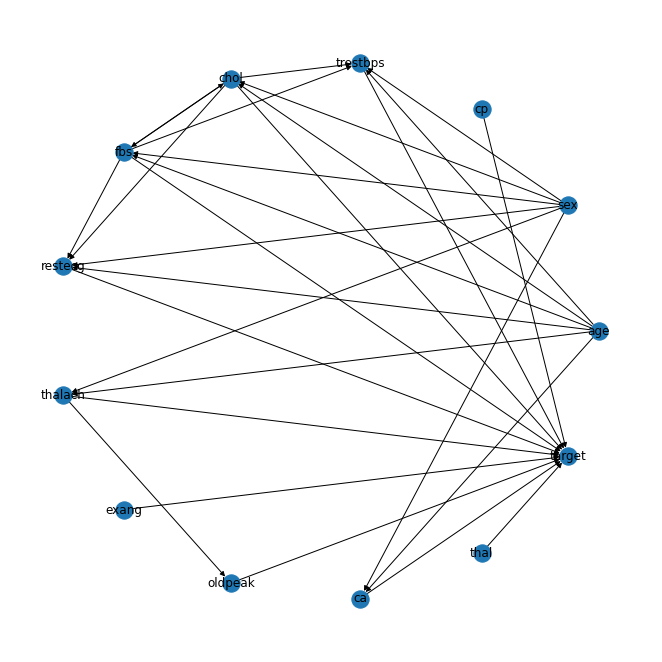

In [136]:
display(bn)

In [133]:
def moralize(bn):
    def get_parents(node):
        return [x[0] for x in bn.in_edges(node)]
    
    nodes = bn.nodes()
    mn = nx.Graph()
    mn.add_nodes_from(nodes)
    
    for node in nodes:
        parents = get_parents(node)
#         print(node, parents)
        
        for par in parents:
            mn.add_edge(node, par)
            
        for par_pair in itertools.combinations(parents, 2):
            if not mn.has_edge(par_pair[0], par_pair[1]):
                mn.add_edge(par_pair[0], par_pair[1])
        
    return mn

In [134]:
mn = moralize(bn)

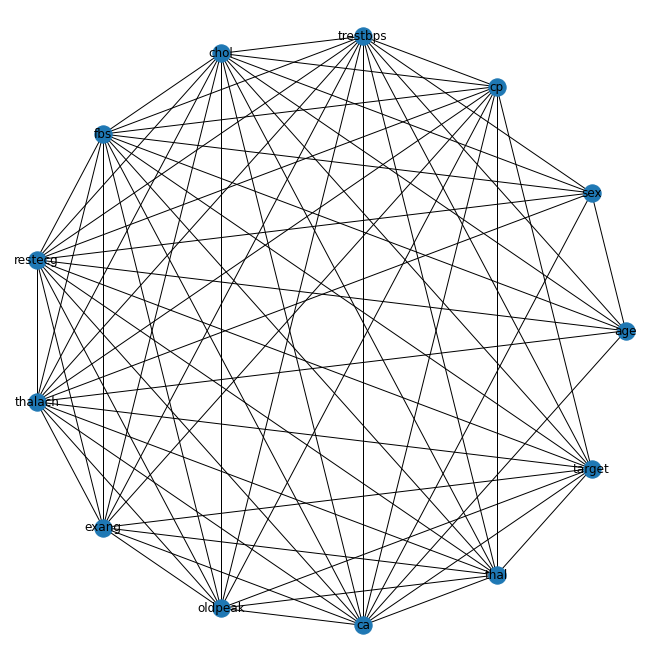

In [137]:
display(mn)